In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Perceptron

In [2]:
class Perceptron(nn.Module):
    """ A perceptron is one linear layer """
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
       
    def forward(self, x_in):
        """The forward pass of the perceptron
        
        Args:
            x_in (torch.Tensor): an input data tensor 
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

# Activation
## Sigmoid

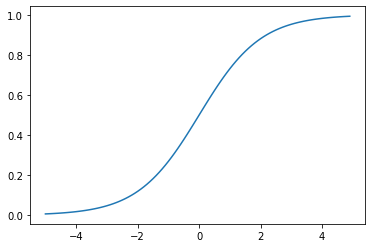

In [3]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## Tanh

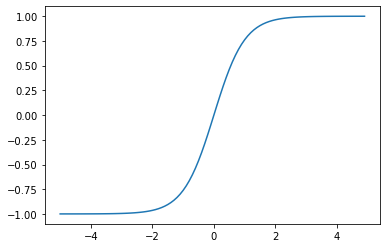

In [4]:
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## ReLU

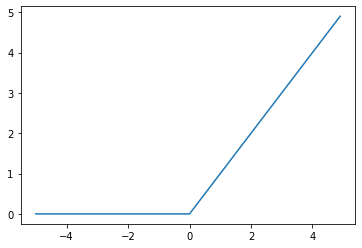

In [5]:
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

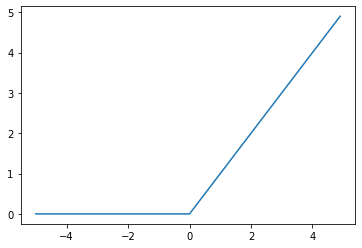

In [6]:
import torch.nn.functional as F
x = torch.arange(-5., 5., 0.1)
y = F.relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## PReLU

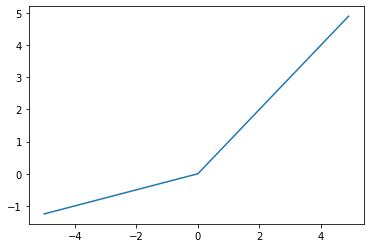

In [7]:
prelu = torch.nn.PReLU()
x = torch.arange(-5., 5., 0.1)
y = prelu(x).detach()
plt.plot(x.numpy(), y.numpy())
plt.show()#

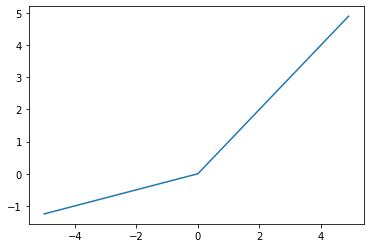

In [8]:
import torch.nn.functional as F
x = torch.arange(-5., 5., 0.1)
y = F.prelu(x, weight=torch.tensor([0.25]))
plt.plot(x.numpy(), y.numpy())
plt.show()

## softmax

tensor([[0.8575, 0.7470, 0.2709]])
tensor([[0.4079, 0.3652, 0.2269]])
tensor([1.])


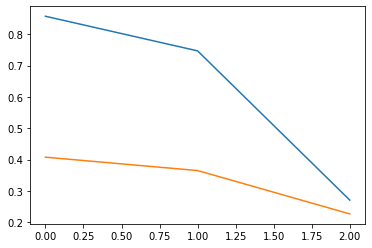

In [9]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)

print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

plt.plot(x_input[0])
plt.plot(y_output[0])

## Mean Squared Error Loss

In [10]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(2, 3, requires_grad=True)
targets = torch.randn(2, 3)
loss = mse_loss(outputs, targets)

print(outputs)
print(targets)
print(loss)
torch.sum((outputs - targets)**2) / len(outputs.ravel())

tensor([[-0.4865,  0.0845, -1.3229],
        [-0.4583,  0.7501,  0.6081]], requires_grad=True)
tensor([[0.2646, 0.9845, 1.1708],
        [0.2857, 0.0835, 2.3852]])
tensor(1.9581, grad_fn=<MseLossBackward0>)


tensor(1.9581, grad_fn=<DivBackward0>)

## Categorical Cross-Entropy Loss

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

softmax = nn.Softmax(dim=1)

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)

print(outputs)
print(loss)
-torch.sum(F.one_hot(targets, num_classes=5) * torch.log(softmax(outputs))) / len(outputs)




tensor([[ 0.9172, -0.9432, -1.3156, -0.5986,  0.7260],
        [-0.3383, -0.4867,  0.7257, -0.2322, -1.7354],
        [ 0.6822,  1.3919, -0.8493,  1.2873, -1.4749]], requires_grad=True)
tensor(1.8504, grad_fn=<NllLossBackward0>)


tensor(1.8504, grad_fn=<DivBackward0>)

## Binary Cross-Entropy Loss

In [12]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0],  dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(targets)
print(loss)

-torch.sum(targets * torch.log(probabilities) + (1 - targets) * torch.log(1 - probabilities)) / 4

tensor([[0.2419],
        [0.9419],
        [0.8832],
        [0.3465]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [0.],
        [1.],
        [0.]])
tensor(1.2036, grad_fn=<BinaryCrossEntropyBackward0>)


tensor(1.2036, grad_fn=<DivBackward0>)